In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import seaborn as sb
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("../data/selected_M_best8.csv")
df = df.drop_duplicates()
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          2.0    138.0           62.0           35.0      0.0  33.6   
1          0.0     84.0           82.0           31.0    125.0  38.2   
2          0.0    145.0            0.0            0.0      0.0  44.2   
3          0.0    135.0           68.0           42.0    250.0  42.3   
4          1.0    139.0           62.0           41.0    480.0  40.7   

   DiabetesPedigreeFunction   Age  Results  
0                     0.127  47.0        1  
1                     0.233  23.0        0  
2                     0.630  31.0        1  
3                     0.365  24.0        1  
4                     0.536  21.0        0  


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Results
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,746.000000
mean,3.752688,120.892473,68.959677,20.908602,79.534946,32.229704,0.472355,33.142473,0.332440
std,3.335541,31.943115,19.317521,16.311726,111.745897,8.206319,0.326181,11.751286,0.471404
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.400000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.300000,0.375500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,130.000000,36.800000,0.632500,40.250000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [4]:
df_features = list(df.columns)
print(df_features)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Results']


In [5]:
print((df[df_features]==0).sum())
print((df[df_features]=="NaN").sum())

Pregnancies                 112
Glucose                       5
BloodPressure                34
SkinThickness               215
Insulin                     359
BMI                          10
DiabetesPedigreeFunction      0
Age                           0
Results                     498
dtype: int64
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Results                     0
dtype: int64


In [6]:
#print((df[X.columns]).isNull().sum())
print(df[df_features].isnull().sum())
print(df.shape)
df = df.dropna(axis = 0)
print(df.shape)
#print(X)

Pregnancies                 2
Glucose                     2
BloodPressure               2
SkinThickness               2
Insulin                     2
BMI                         2
DiabetesPedigreeFunction    2
Age                         2
Results                     0
dtype: int64
(746, 9)
(744, 9)


In [7]:

# temp = df[df['BloodPressure']!=0.000000]
# df['BloodPressure'] = df['BloodPressure'].replace( 0.000000 , temp.mean()[0])

# temp = df[df['Glucose']!=0.000000]
# df['Glucose'] = df['Glucose'].replace( 0.000000 , temp.mean()[0])

# temp = df[df['BMI']!=0.000000]
# df['BMI'] = df['BMI'].replace( 0.000000 , temp.mean()[0])


print((df[df_features]==0).sum())


Pregnancies                 112
Glucose                       5
BloodPressure                34
SkinThickness               215
Insulin                     359
BMI                          10
DiabetesPedigreeFunction      0
Age                           0
Results                     497
dtype: int64


In [8]:
print(df.max())

Pregnancies                  17.00
Glucose                     199.00
BloodPressure               122.00
SkinThickness               110.00
Insulin                     744.00
BMI                          80.60
DiabetesPedigreeFunction      2.42
Age                          81.00
Results                       1.00
dtype: float64


In [9]:
print(df.min())

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Results                      0.000
dtype: float64


In [10]:
print(df.max() - df.min())

Pregnancies                  17.000
Glucose                     199.000
BloodPressure               122.000
SkinThickness               110.000
Insulin                     744.000
BMI                          80.600
DiabetesPedigreeFunction      2.342
Age                          60.000
Results                       1.000
dtype: float64


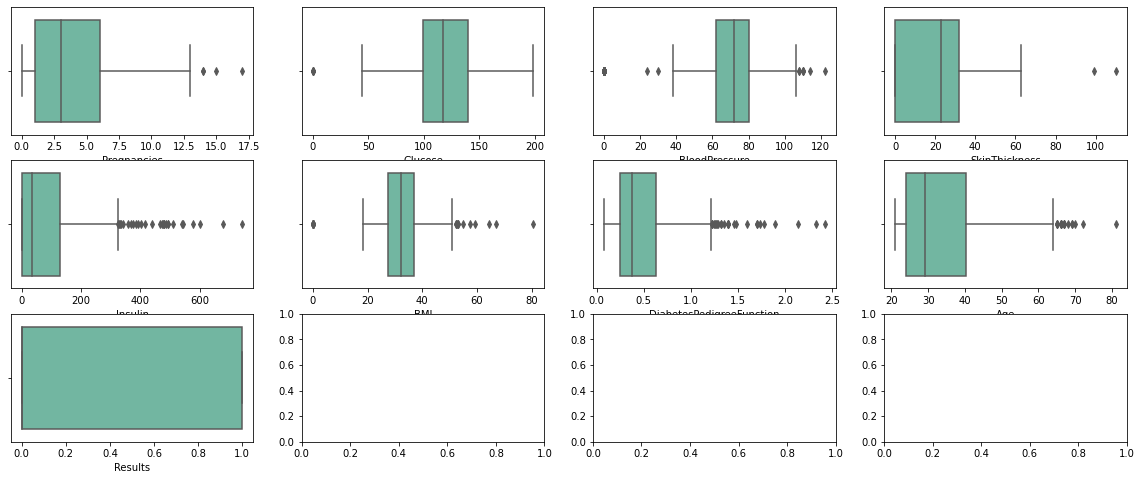

In [11]:
fig, axes = plt.subplots(3,4, figsize=(20,8))
x_,y_ = 0,0
for i, column in enumerate(df.columns[:]):    
    sb.boxplot(x=df[column], ax=axes[x_,y_], palette="Set2")
    if i < 3:
        y_ += 1
    elif i == 3: 
        x_ = 1
        y_ = 0
    elif i == 7: 
        x_ = 2
        y_ = 0
    else:
        y_ += 1

In [12]:
cols = df.columns
print(cols)
scaler = MinMaxScaler()
dat = scaler.fit_transform(df)
df_01 = pd.DataFrame(data=dat, columns=cols)  
print(df_01.head())

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Results'],
      dtype='object')
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.117647  0.693467       0.508197       0.318182  0.000000  0.416873   
1     0.000000  0.422111       0.672131       0.281818  0.168011  0.473945   
2     0.000000  0.728643       0.000000       0.000000  0.000000  0.548387   
3     0.000000  0.678392       0.557377       0.381818  0.336022  0.524814   
4     0.058824  0.698492       0.508197       0.372727  0.645161  0.504963   

   DiabetesPedigreeFunction       Age  Results  
0                  0.020922  0.433333      1.0  
1                  0.066183  0.033333      0.0  
2                  0.235696  0.166667      1.0  
3                  0.122545  0.050000      1.0  
4                  0.195559  0.000000      0.0  


In [13]:
print(df_01.max() - df_01.min())

Pregnancies                 1.0
Glucose                     1.0
BloodPressure               1.0
SkinThickness               1.0
Insulin                     1.0
BMI                         1.0
DiabetesPedigreeFunction    1.0
Age                         1.0
Results                     1.0
dtype: float64


In [14]:
x = df_01.drop(["Results"], axis =1);
y = df_01["Results"]
print(y.value_counts())

0.0    497
1.0    247
Name: Results, dtype: int64


(array([497.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 247.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

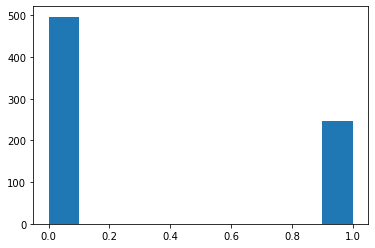

In [15]:
plt.hist(y)

0.0    274
1.0    247
Name: Results, dtype: int64


(array([274.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 247.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

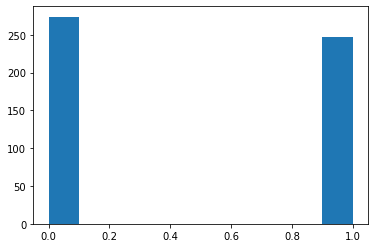

In [16]:
# transform the dataset
under = RandomUnderSampler(sampling_strategy= 0.9, random_state=0)
X, Y = under.fit_resample(x, y)
print(Y.value_counts())
plt.hist(Y)

0.0    274
1.0    274
Name: Results, dtype: int64


(array([274.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 274.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

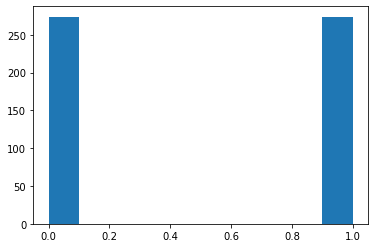

In [17]:
smt = SMOTE(random_state=0)
X, Y = smt.fit_resample(X,Y)
print(Y.value_counts())
plt.hist(Y)

In [18]:
# creating a decision tree classifier
dt_model = tree.DecisionTreeClassifier()
param_grid_dt = {
     
}
cv_array = [2,3,4,5]
for cv in cv_array:
    gridSearchRF = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, scoring='accuracy', n_jobs=-1, cv=cv)
    gridSearchRF.fit(X, Y)
    print("CV value : ", cv)
    print("Parameters : ", gridSearchRF.best_params_)
    print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
    print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {}
Accuracy :  58.394
Standed deviation :  0.365
CV value :  3
Parameters :  {}
Accuracy :  59.301
Standed deviation :  2.782
CV value :  4
Parameters :  {}
Accuracy :  59.489
Standed deviation :  3.914
CV value :  5
Parameters :  {}
Accuracy :  62.025
Standed deviation :  7.155


In [19]:
# creating a Gradient boosting classifier
gb_model = GradientBoostingClassifier()
param_grid_gb = {
     'random_state': [0, 1, 2,3,4,5 , 10, 20, 30, 40, 50]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'random_state': 5}
Accuracy :  64.234
Standed deviation :  1.825
CV value :  3
Parameters :  {'random_state': 40}
Accuracy :  65.137
Standed deviation :  3.389
CV value :  4
Parameters :  {'random_state': 40}
Accuracy :  64.599
Standed deviation :  1.672
CV value :  5
Parameters :  {'random_state': 5}
Accuracy :  65.119
Standed deviation :  6.865


In [20]:
# creating a KNN classifier
KNN_model =KNeighborsClassifier()
param_grid_knn = {
     'n_neighbors': [3, 5, 7, 11, 13, 17]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=KNN_model, param_grid=param_grid_knn, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'n_neighbors': 5}
Accuracy :  63.139
Standed deviation :  2.190
CV value :  3
Parameters :  {'n_neighbors': 13}
Accuracy :  65.692
Standed deviation :  4.503
CV value :  4
Parameters :  {'n_neighbors': 13}
Accuracy :  66.606
Standed deviation :  3.280
CV value :  5
Parameters :  {'n_neighbors': 17}
Accuracy :  65.668
Standed deviation :  7.751


In [21]:
# creating a Lgistic regression classifier
lr_model = LogisticRegression() 

param_grid_lr = {
     'max_iter': [100, 200, 300, 400, 500]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {'max_iter': 100}
Accuracy :  66.423
Standed deviation :  5.839
CV value :  3
Parameters :  {'max_iter': 100}
Accuracy :  67.684
Standed deviation :  6.857
CV value :  4
Parameters :  {'max_iter': 100}
Accuracy :  67.883
Standed deviation :  6.063
CV value :  5
Parameters :  {'max_iter': 100}
Accuracy :  67.303
Standed deviation :  8.489


In [22]:
# creating a Nave Bayers classifier
nb_model = MultinomialNB()
param_grid_nb = {

}
for cv in cv_array:
    gridSearchRF = GridSearchCV(estimator=nb_model, param_grid=param_grid_nb, scoring='accuracy', n_jobs=-1, cv=cv)
    gridSearchRF.fit(X, Y)
    print("CV value : ", cv)
    print("Parameters : ", gridSearchRF.best_params_)
    print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
    print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {}
Accuracy :  53.832
Standed deviation :  2.007
CV value :  3
Parameters :  {}
Accuracy :  56.205
Standed deviation :  3.358
CV value :  4
Parameters :  {}
Accuracy :  54.562
Standed deviation :  2.937
CV value :  5
Parameters :  {}
Accuracy :  55.278
Standed deviation :  5.049


In [23]:
# creating a SVM classifier
svm_model = svm.SVC()
param_grid_svm = {
     'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {'kernel': 'rbf'}
Accuracy :  67.153
Standed deviation :  4.015
CV value :  3
Parameters :  {'kernel': 'linear'}
Accuracy :  67.319
Standed deviation :  6.515
CV value :  4
Parameters :  {'kernel': 'linear'}
Accuracy :  66.971
Standed deviation :  4.627
CV value :  5
Parameters :  {'kernel': 'linear'}
Accuracy :  66.025
Standed deviation :  8.265


In [24]:
# creating a Random forest classifier
rf = RandomForestClassifier()
param_grid_rf = {
     'max_depth': [80, 90, 100, 110, 150, 200, 300],
     'max_features': [2, 3, 4, 5,6],
     'n_estimators': [100, 200, 300]
}

for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'max_depth': 150, 'max_features': 4, 'n_estimators': 200}
Accuracy :  65.511
Standed deviation :  3.832
CV value :  3
Parameters :  {'max_depth': 150, 'max_features': 2, 'n_estimators': 200}
Accuracy :  67.690
Standed deviation :  4.790
CV value :  4
Parameters :  {'max_depth': 80, 'max_features': 3, 'n_estimators': 200}
Accuracy :  67.153
Standed deviation :  3.462
CV value :  5
Parameters :  {'max_depth': 110, 'max_features': 4, 'n_estimators': 200}
Accuracy :  67.304
Standed deviation :  8.533
